In [23]:
import pandas as pd
import numpy as np
import os

#get the path to current folder
current_dir = os.getcwd()

# Navigate to the parent directory (assuming "Data" folder is at the same level as "EDA" folder)
data_dir = os.path.join(current_dir, '..', 'Data')

# Specify the relative path to the file
file_path = os.path.join(data_dir, 'DataCoSupplyChainDataset.csv')

df = pd.read_csv(file_path,encoding='latin-1')

df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [24]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [25]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

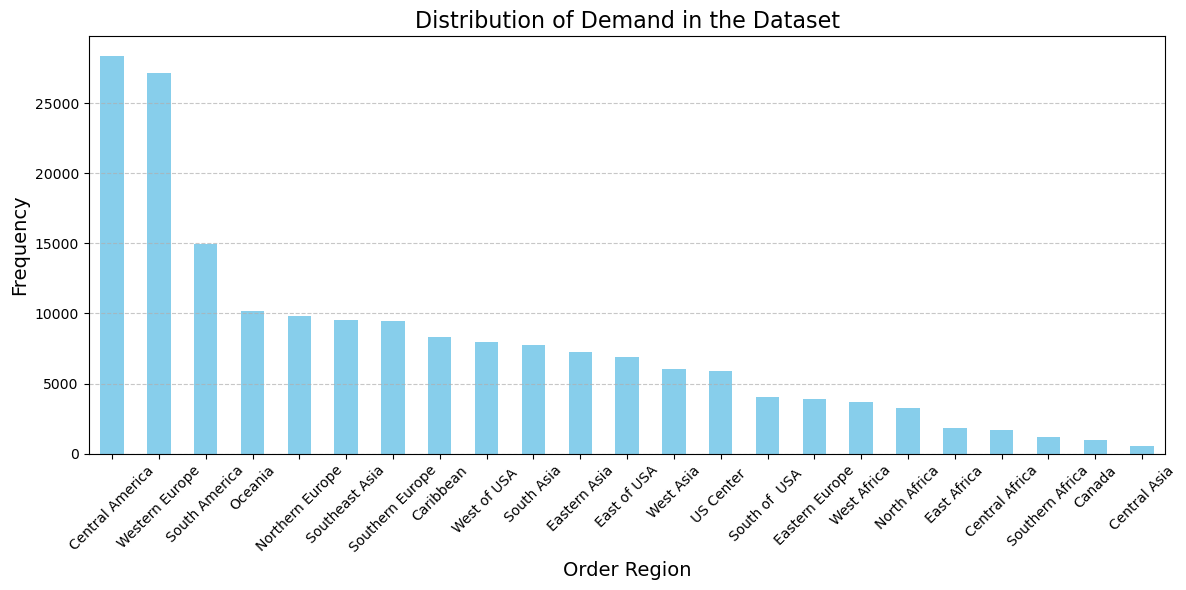

In [26]:
import matplotlib.pyplot as plt

# Plot the 'Market' column
plt.figure(figsize=(12, 6))  # Adjust the size as needed
df['Order Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Demand in the Dataset', fontsize=16)
plt.xlabel('Order Region', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


/var/folders/_y/0xw7_0ss0s3f4kfhj9xl96zw0000gn/T/ipykernel_15613/954924582.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels


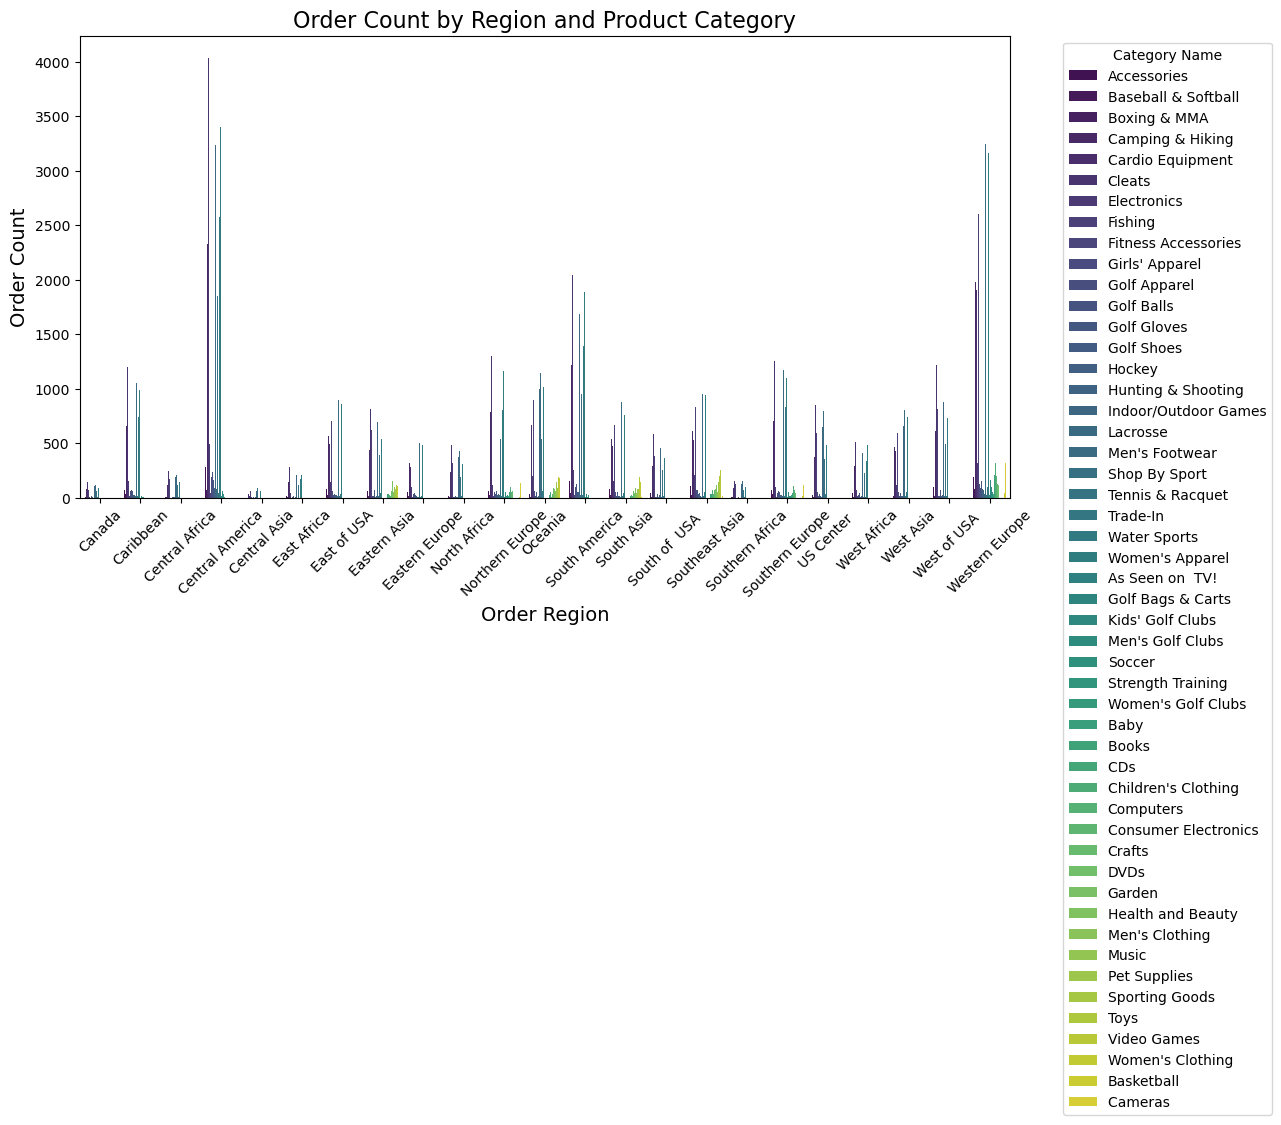

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Group the data by 'Order Region' and 'Category Name' to count the number of orders
grouped_data = df.groupby(['Order Region', 'Category Name']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Order Region', y='Count', hue='Category Name', palette='viridis')
plt.title('Order Count by Region and Product Category', fontsize=16)
plt.xlabel('Order Region', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.0)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

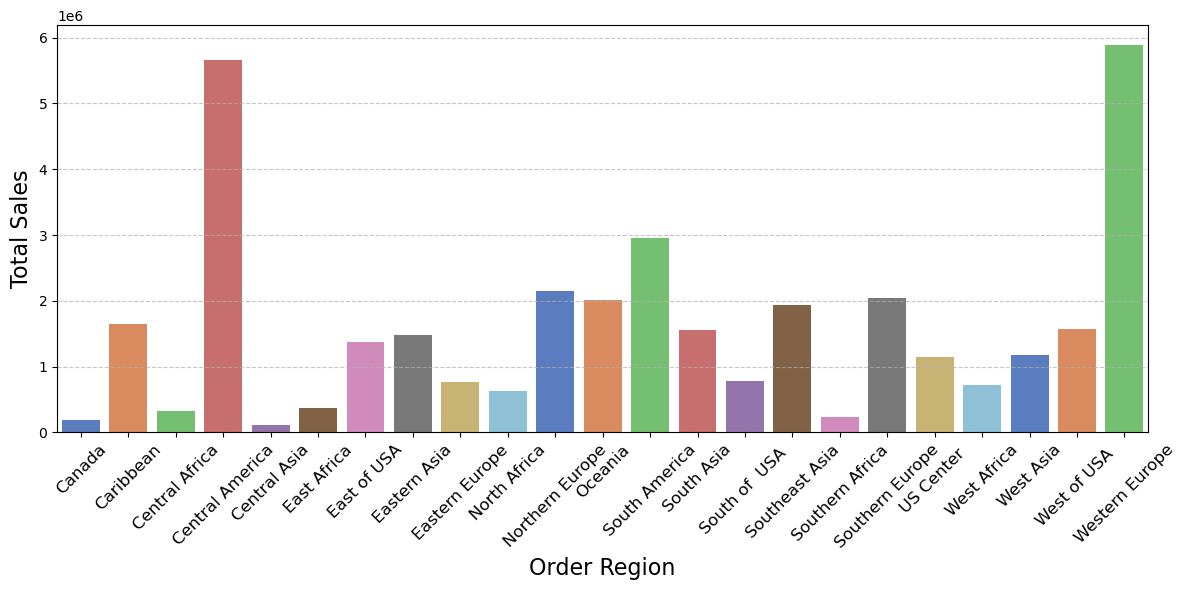

In [35]:
# Group the data by 'Order Region' and sum the 'Sales'
sales_data = df.groupby('Order Region')['Sales'].sum().reset_index()
# Use default style for the plots
plt.style.use('default')


# Plotting
plt.figure(figsize=(12, 6))
# Use a muted palette for a more formal look
sns.barplot(data=sales_data, x='Order Region', y='Sales', palette='muted')
# plt.title('Total Sales by Order Region', fontsize=16)
plt.xlabel('Order Region', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Change fontsize to your desired size

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Save the figure
plt.savefig('total_sales_by_order_region.png', dpi=1000, bbox_inches='tight')
plt.show()

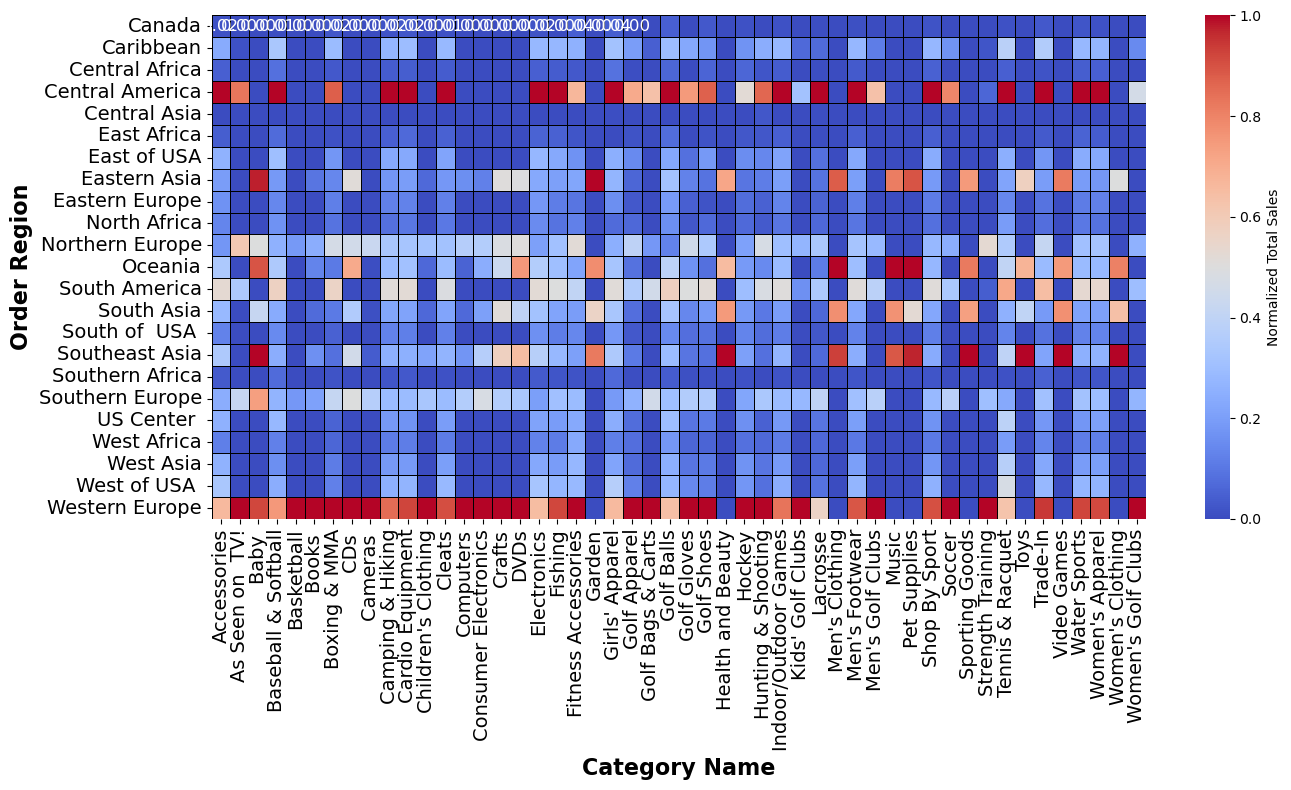

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Group the data by 'Order Region' and 'Category Name' to sum the sales
heatmap_data = df.groupby(['Order Region', 'Category Name'])['Sales'].sum().unstack(fill_value=0)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(heatmap_data)
normalized_heatmap_data = pd.DataFrame(normalized_data, columns=heatmap_data.columns, index=heatmap_data.index)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(normalized_heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Normalized Total Sales'},
            linewidths=.5, linecolor='black', annot_kws={'size': 12})  # Increase annotation font size
# plt.title('Heatmap of Normalized Total Sales by Order Region and Product Category', fontsize=20, weight='bold')
plt.xlabel('Category Name', fontsize=16, weight='bold')
plt.ylabel('Order Region', fontsize=16, weight='bold')
plt.xticks(rotation=90, fontsize=14)  # Rotate x-axis labels and increase font size
plt.yticks(rotation=0, fontsize=14)   # Keep y-axis labels horizontal and increase font size
plt.tight_layout()                    # Adjust layout to prevent clipping of tick-labels

# Save the figure
plt.savefig('sales_heatmap_order_region_category_normalized.png', dpi=1000, bbox_inches='tight')  # Save the figure
plt.show()

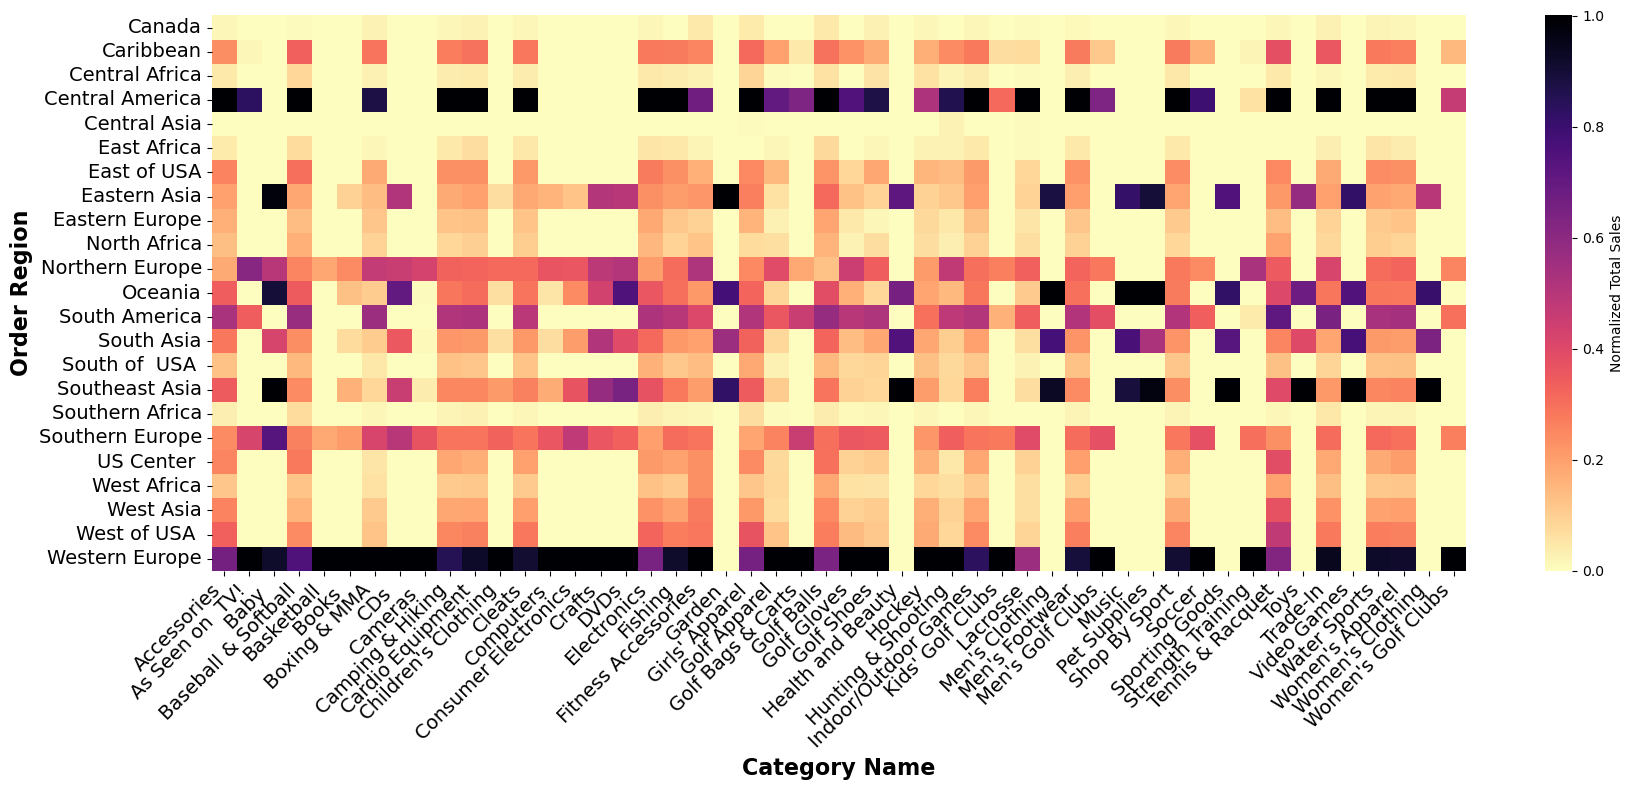

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Group the data by 'Order Region' and 'Category Name' to sum the sales
heatmap_data = df.groupby(['Order Region', 'Category Name'])['Sales'].sum().unstack(fill_value=0)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(heatmap_data)
normalized_heatmap_data = pd.DataFrame(normalized_data, columns=heatmap_data.columns, index=heatmap_data.index)

# Plotting the heatmap
plt.figure(figsize=(18, 8))

# Use a beautiful color palette (e.g., 'viridis', 'plasma', 'magma')
sns.heatmap(normalized_heatmap_data, cmap='magma_r', annot=False, fmt='.2f', cbar_kws={'label': 'Normalized Total Sales'},
            linewidths=0, linecolor='white')  # No grid lines in the heatmap

# Improve x-axis and y-axis labels: rotate x-axis labels and adjust font style
plt.xlabel('Category Name', fontsize=16, weight='bold')  # Bold x-axis label
plt.ylabel('Order Region', fontsize=16, weight='bold')  # Bold y-axis label

# Rotate x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=45, fontsize=14, ha='right')  # Rotate x-axis labels at 45 degrees and align them to the right
plt.yticks(rotation=0, fontsize=14)  # Keep y-axis labels horizontal

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure
plt.savefig('sales_heatmap_order_region_category_normalized.png', dpi=1000, bbox_inches='tight')  # Save the figure
plt.show()


/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


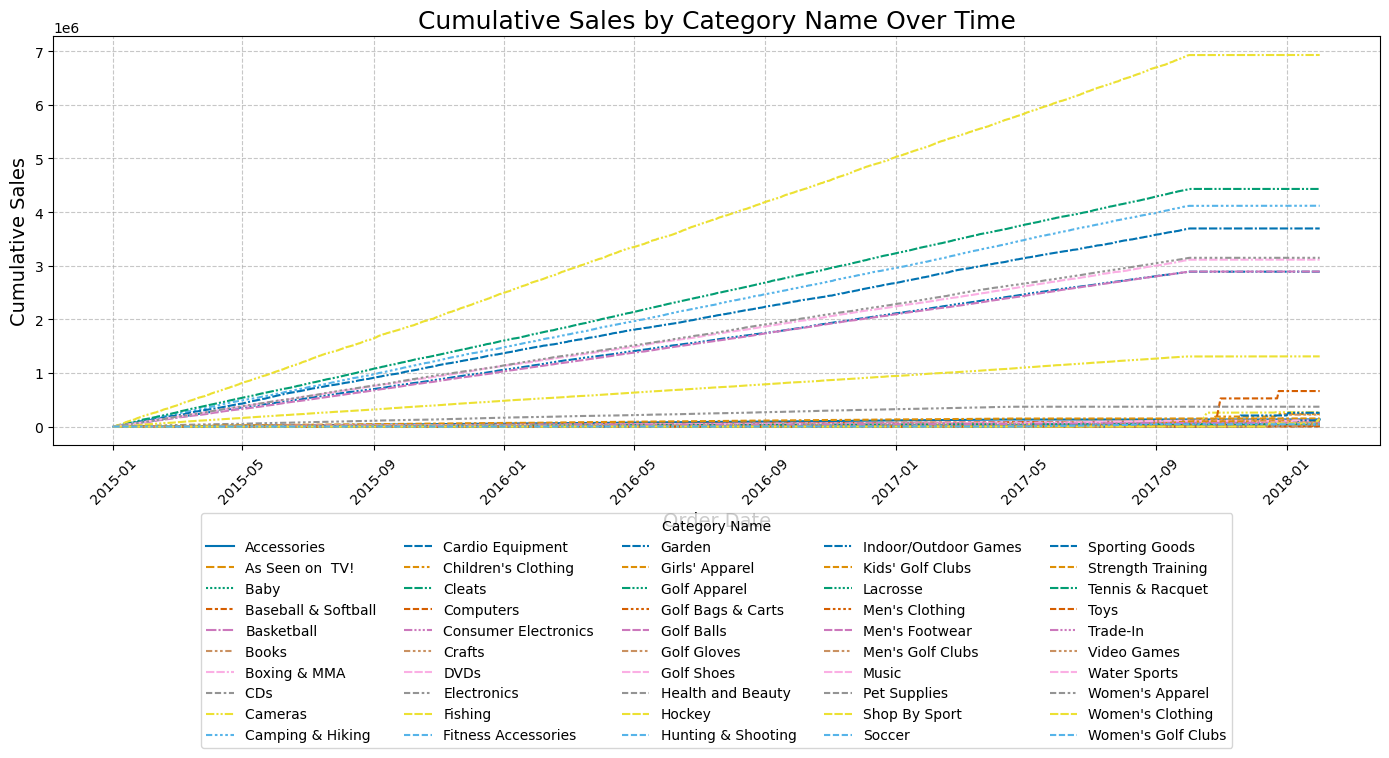

In [30]:
# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Group the data by 'Order Date' and 'Category Name', summing the 'Sales'
time_series_data = df.groupby(['order date (DateOrders)', 'Category Name'])['Sales'].sum().reset_index()

# Pivot the data for better visualization
time_series_pivot = time_series_data.pivot(index='order date (DateOrders)', columns='Category Name', values='Sales').fillna(0)

# Calculate cumulative sales
cumulative_sales = time_series_pivot.cumsum()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=cumulative_sales, palette='colorblind')  # Use a colorblind-friendly palette
plt.title('Cumulative Sales by Category Name Over Time', fontsize=18)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Cumulative Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust the legend to be below the plot
plt.legend(title='Category Name', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)  # Adjust 'ncol' for layout

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Save the figure
plt.savefig('cumulative_sales_by_category_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


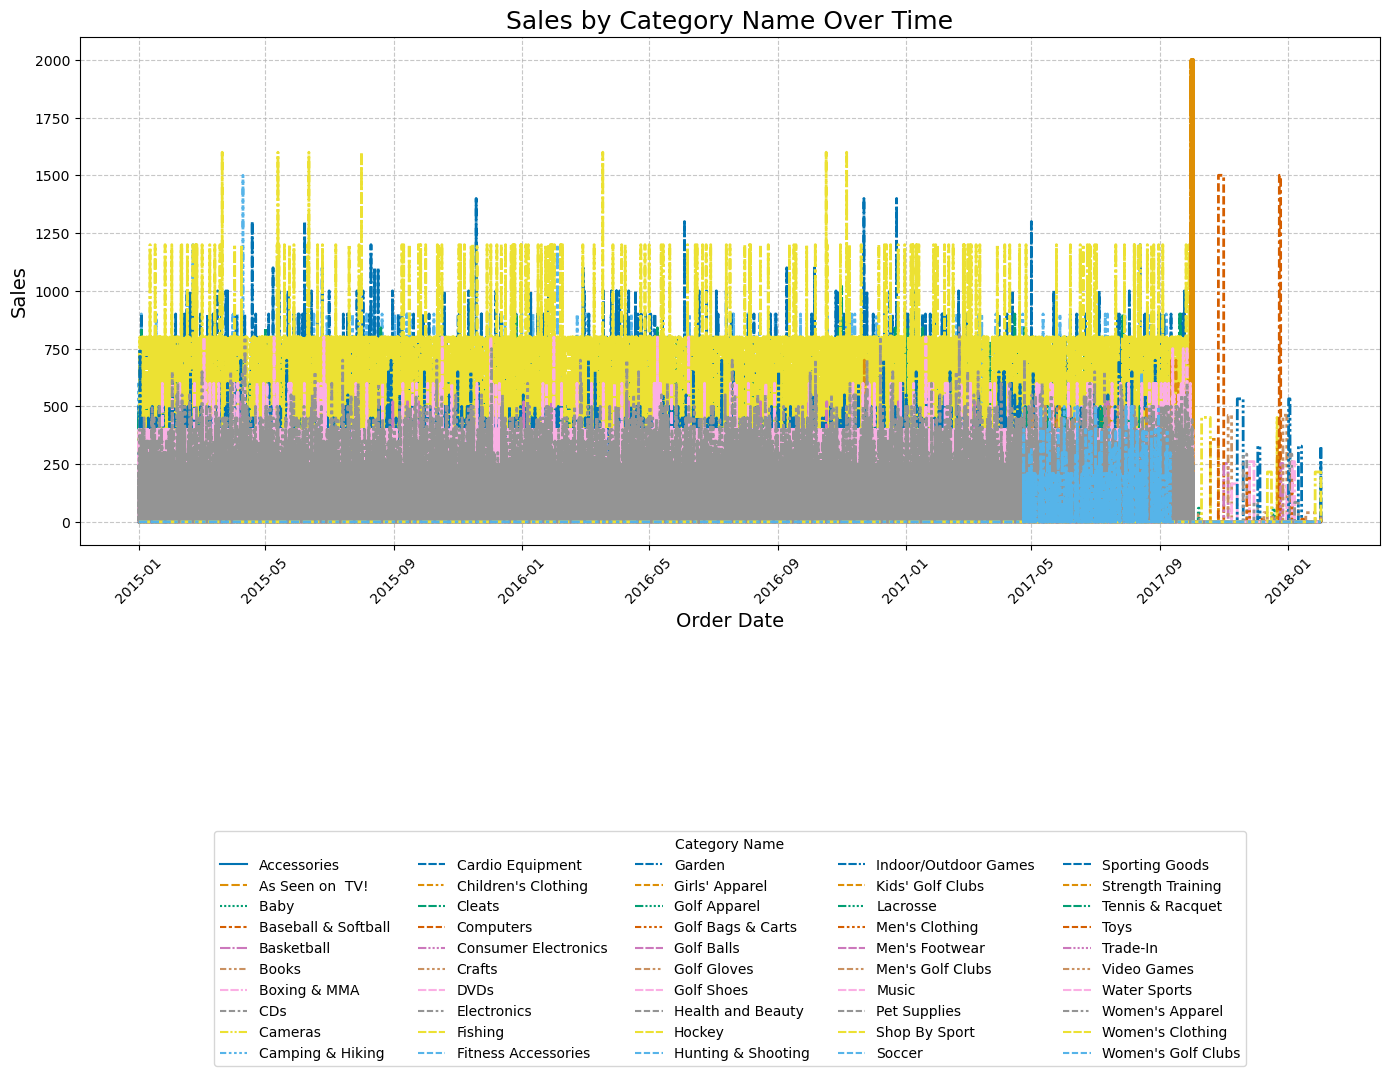

In [31]:
# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Group the data by 'Order Date' and 'Category Name', summing the 'Sales'
time_series_data = df.groupby(['order date (DateOrders)', 'Category Name'])['Sales'].sum().reset_index()

# Pivot the data for better visualization
time_series_pivot = time_series_data.pivot(index='order date (DateOrders)', columns='Category Name', values='Sales').fillna(0)

# Plotting
plt.figure(figsize=(14, 14))
sns.lineplot(data=time_series_pivot, palette='colorblind', linewidth=2)  # Use a colorblind-friendly palette
plt.title('Sales by Category Name Over Time', fontsize=18)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust the legend to be below the plot
plt.legend(title='Category Name', bbox_to_anchor=(0.5, -0.55), loc='upper center', ncol=5)  # Adjust 'ncol' for layout

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Save the figure
plt.savefig('sales_by_category_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


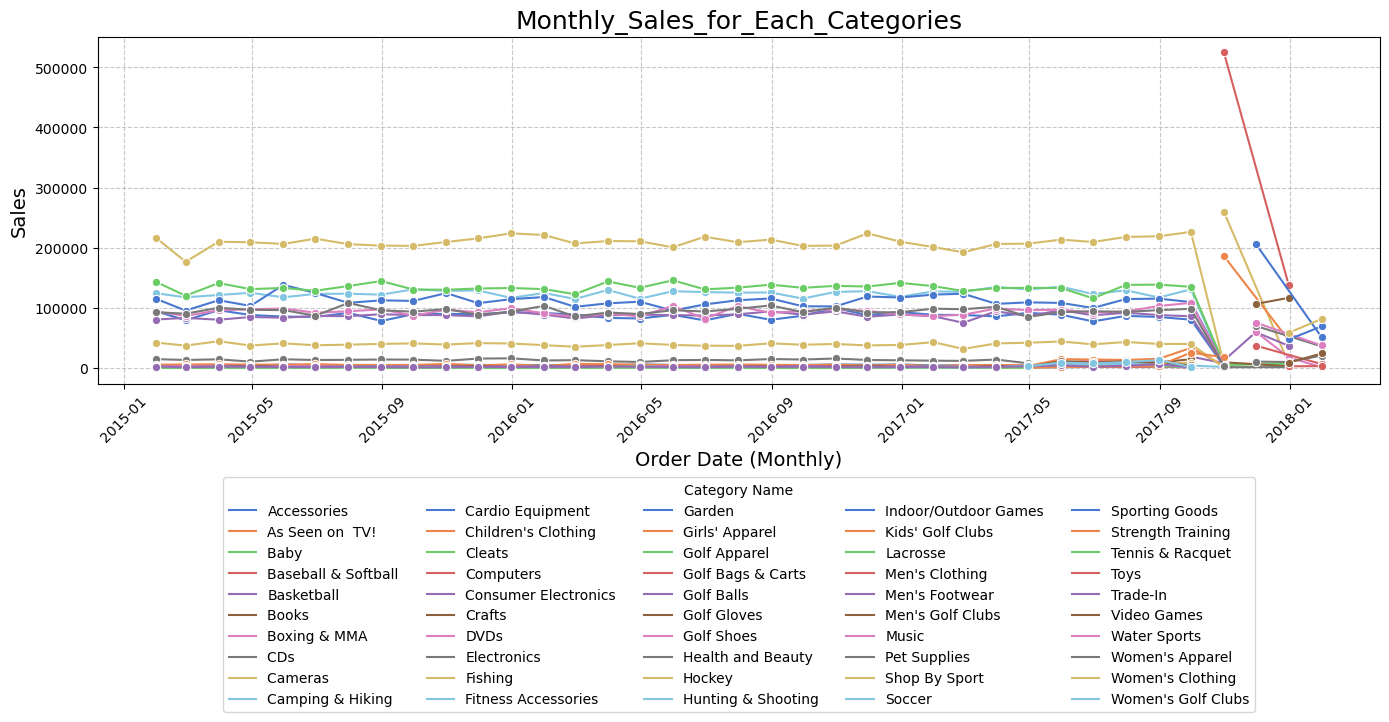

In [32]:
# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Group the data by 'Category Name' and 'Order Date' at a monthly frequency, summing the 'Sales'
monthly_sales_data = df.groupby(['Category Name', pd.Grouper(key='order date (DateOrders)', freq='M')])['Sales'].sum().reset_index()

# Get the top 10 categories by total sales
total_sales_by_category = df.groupby('Category Name')['Sales'].sum().reset_index()
top_10_categories = total_sales_by_category.nlargest(10, 'Sales')['Category Name']

# Filter the monthly sales data for only the top 10 categories
monthly_sales_top_10 = monthly_sales_data

# Plotting
plt.figure(figsize=(14, 8))

# Line plot for each top 10 category
sns.lineplot(data=monthly_sales_top_10, x='order date (DateOrders)', y='Sales', hue='Category Name', marker='o', palette='muted')

plt.title('Monthly_Sales_for_Each_Categories', fontsize=18)
plt.xlabel('Order Date (Monthly)', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust the legend to be below the plot
plt.legend(title='Category Name', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)  # Adjust 'ncol' for layout

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Save the fi
plt.show()

/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yunbo/anaconda3/envs/basic/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


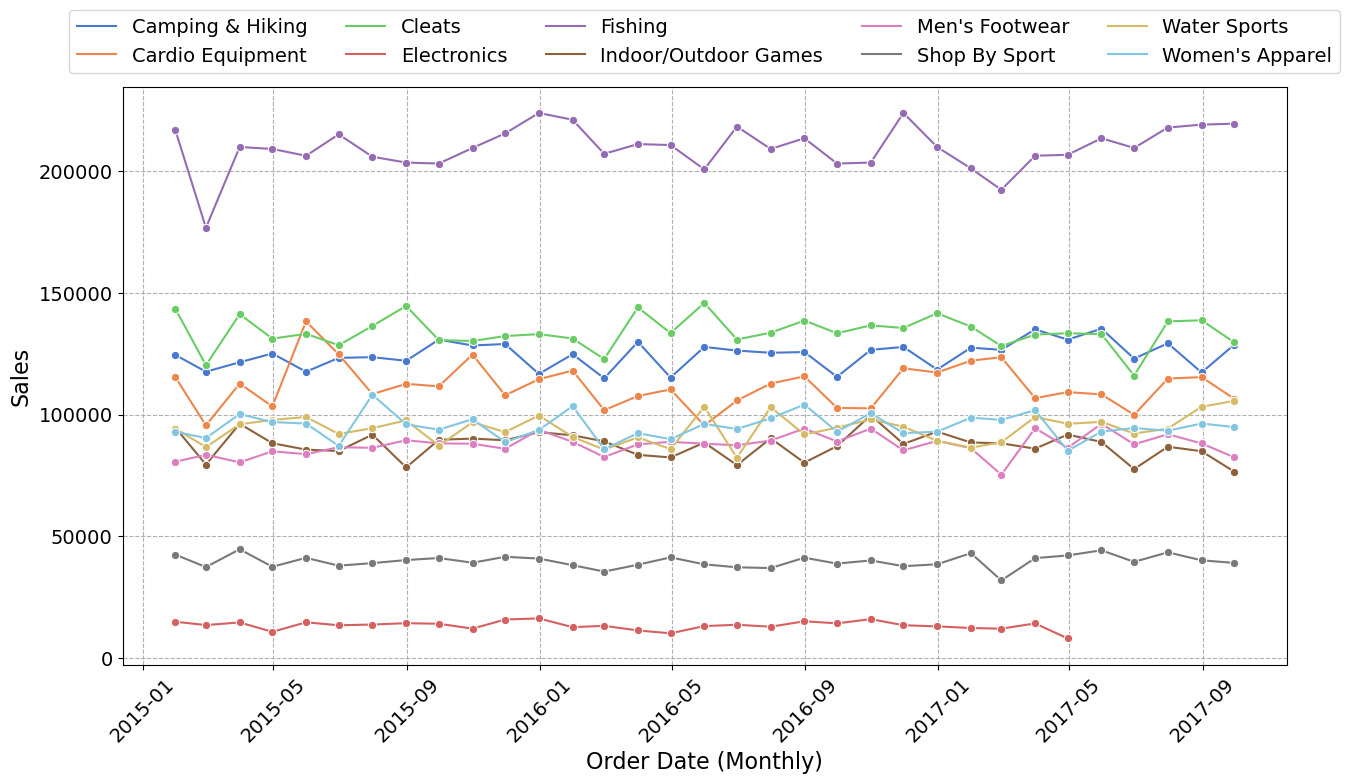

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Filter data up to September 2017
df_filtered = df[df['order date (DateOrders)'] <= '2017-09-30']

# Group the data by 'Category Name' and 'Order Date' at a monthly frequency, summing the 'Sales'
monthly_sales_data = df_filtered.groupby(['Category Name', pd.Grouper(key='order date (DateOrders)', freq='M')])['Sales'].sum().reset_index()

# Get the top 10 categories by total sales
total_sales_by_category = df_filtered.groupby('Category Name')['Sales'].sum().reset_index()
top_10_categories = total_sales_by_category.nlargest(10, 'Sales')['Category Name']

# Filter the monthly sales data for only the top 10 categories
monthly_sales_top_10 = monthly_sales_data[monthly_sales_data['Category Name'].isin(top_10_categories)]

# Plotting
plt.figure(figsize=(14, 8))

# Line plot for each top 10 category
sns.lineplot(data=monthly_sales_top_10, x='order date (DateOrders)', y='Sales', hue='Category Name', marker='o', palette='muted')

# Customize the plot
plt.xlabel('Order Date (Monthly)', fontsize=16)  # Set x-axis label font size to 16
plt.ylabel('Sales', fontsize=16)  # Set y-axis label font size to 16
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels and set font size to 14
plt.yticks(fontsize=14)  # Set y-axis tick labels font size to 14
plt.grid(visible=True, linestyle='--', alpha=1)

# Adjust the legend to be at the top
plt.legend( bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5, fontsize=14)  # Move legend to the top

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Save the figure
plt.savefig('monthly_sales_top_10_categories_until_2017_09.png', dpi=1000, bbox_inches='tight')  # Save the figure
plt.show()

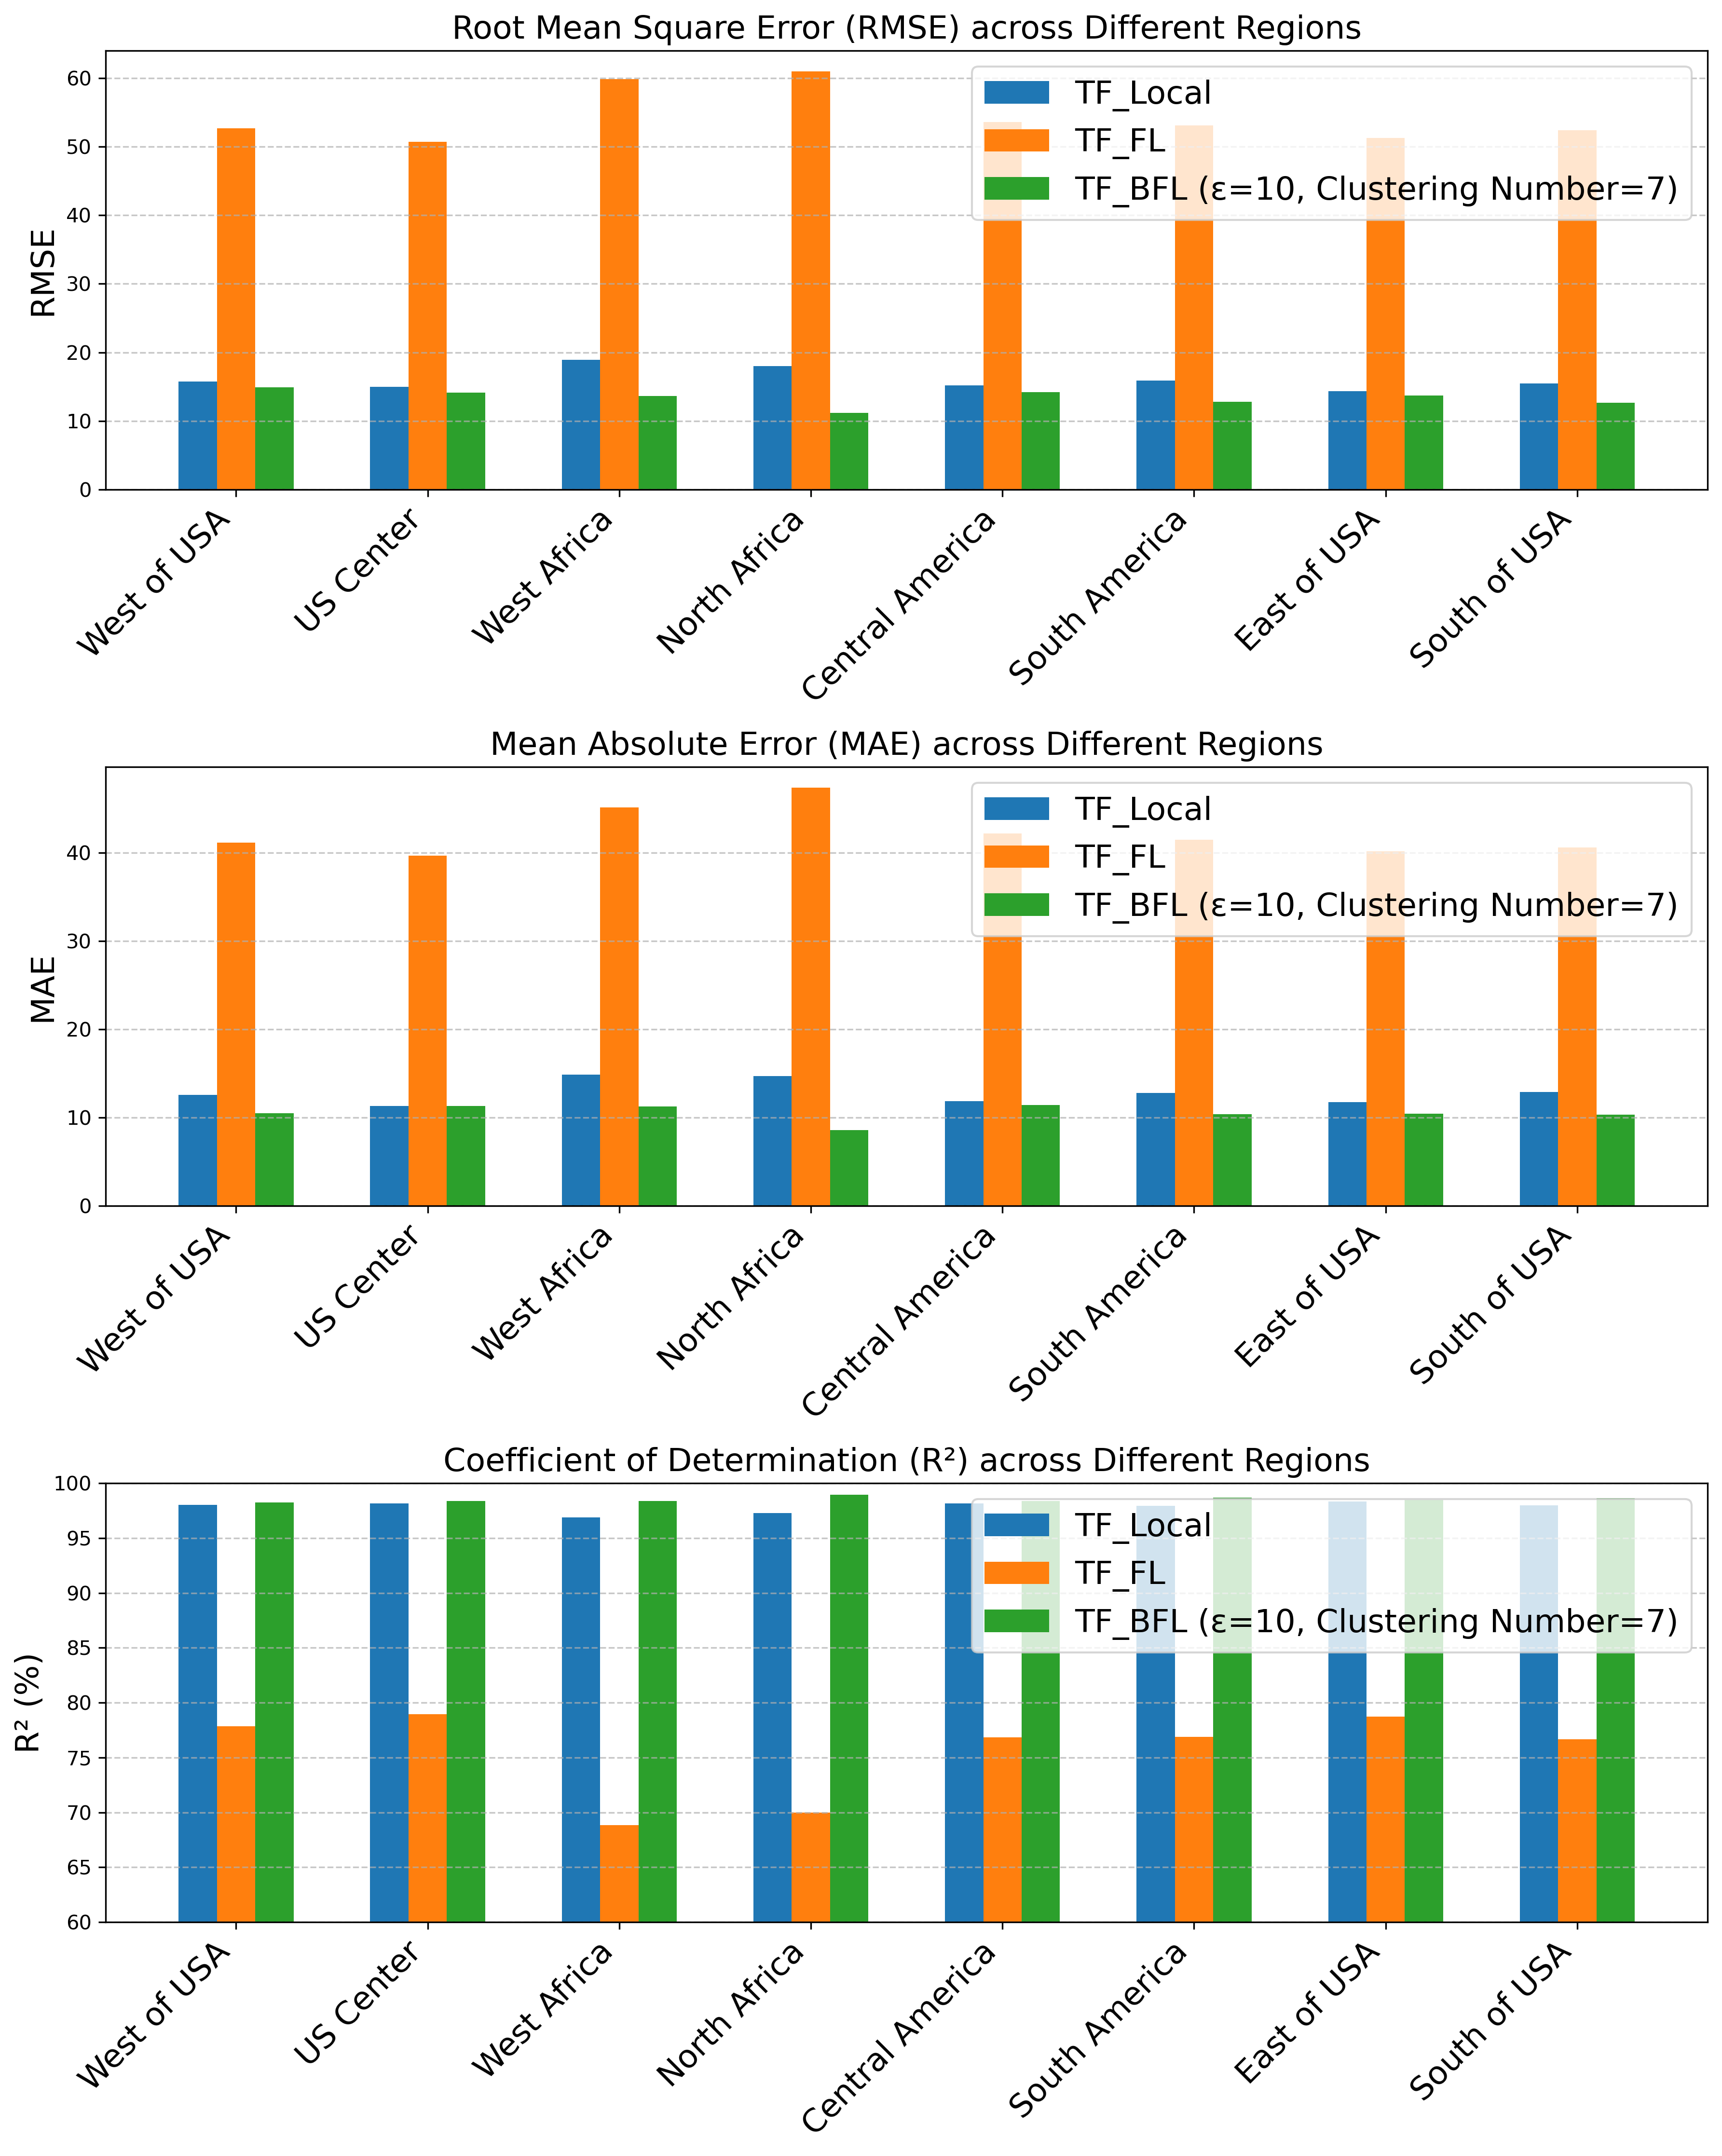

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics, models, and regions
metrics = ['RMSE', 'MAE', 'R²']
models = ['TF_Local', 'TF_FL', 'TF_BFL (ε=10, Clustering Number=7)']
regions = ['West of USA', 'US Center', 'West Africa', 'North Africa', 'Central America', 'South America', 'East of USA', 'South of USA']

# Data for each metric
rmse_values = [
    [15.74, 52.66, 14.90],  # West of USA
    [15.01, 50.71, 14.13],  # US Center
    [18.95, 59.83, 13.63],  # West Africa
    [18.01, 60.93, 11.19],  # North Africa
    [15.19, 53.58, 14.23],  # Central America
    [15.88, 53.06, 12.79],  # South America
    [14.38, 51.26, 13.73],  # East of USA
    [15.50, 52.37, 12.65]   # South of USA
]

mae_values = [
    [12.56, 41.15, 10.52],  # West of USA
    [11.31, 39.67, 11.32],  # US Center
    [14.85, 45.11, 11.24],  # West Africa
    [14.72, 47.35, 8.56],   # North Africa
    [11.88, 42.17, 11.40],  # Central America
    [12.76, 41.49, 10.41],  # South America
    [11.77, 40.17, 10.44],  # East of USA
    [12.91, 40.57, 10.33]   # South of USA
]

R2_values = [
    [98.01, 77.84, 98.22],  # West of USA
    [98.15, 78.96, 98.37],  # US Center
    [96.87, 68.82, 98.39],  # West Africa
    [97.28, 69.99, 98.95],  # North Africa
    [98.14, 76.85, 98.37],  # Central America
    [97.93, 76.88, 98.66],  # South America
    [98.31, 78.71, 98.46],  # East of USA
    [97.97, 76.68, 98.65]   # South of USA
]

# Define bar width and the x locations for the groups
bar_width = 0.2
x = np.arange(len(regions))

# Set up the figure and subplots with better aesthetics
fig, ax = plt.subplots(3, 1, figsize=(12, 15), dpi=300)

# Adjust styles for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Define a larger font size
font_size_title = 16
font_size_labels = 16
font_size_ticks = 16

# Plot for RMSE
ax[0].bar(x - bar_width, [val[0] for val in rmse_values], bar_width, label=models[0], color=colors[0])
ax[0].bar(x, [val[1] for val in rmse_values], bar_width, label=models[1], color=colors[1])
ax[0].bar(x + bar_width, [val[2] for val in rmse_values], bar_width, label=models[2], color=colors[2])
ax[0].set_xticks(x)
ax[0].set_xticklabels(regions, rotation=45, ha='right', fontsize=font_size_ticks)
ax[0].set_ylabel('RMSE', fontsize=font_size_labels)
ax[0].set_title('Root Mean Square Error (RMSE) across Different Regions', fontsize=font_size_title)
ax[0].legend(loc='upper right', fontsize=font_size_labels)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for MAE
ax[1].bar(x - bar_width, [val[0] for val in mae_values], bar_width, label=models[0], color=colors[0])
ax[1].bar(x, [val[1] for val in mae_values], bar_width, label=models[1], color=colors[1])
ax[1].bar(x + bar_width, [val[2] for val in mae_values], bar_width, label=models[2], color=colors[2])
ax[1].set_xticks(x)
ax[1].set_xticklabels(regions, rotation=45, ha='right', fontsize=font_size_ticks)
ax[1].set_ylabel('MAE', fontsize=font_size_labels)
ax[1].set_title('Mean Absolute Error (MAE) across Different Regions', fontsize=font_size_title)
ax[1].legend(loc='upper right', fontsize=font_size_labels)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for R²
ax[2].bar(x - bar_width, [val[0] for val in R2_values], bar_width, label=models[0], color=colors[0])
ax[2].bar(x, [val[1] for val in R2_values], bar_width, label=models[1], color=colors[1])
ax[2].bar(x + bar_width, [val[2] for val in R2_values], bar_width, label=models[2], color=colors[2])
ax[2].set_xticks(x)
ax[2].set_xticklabels(regions, rotation=45, ha='right', fontsize=font_size_ticks)
ax[2].set_ylabel('R² (%)', fontsize=font_size_labels)
ax[2].set_title('Coefficient of Determination (R²) across Different Regions', fontsize=font_size_title)
ax[2].legend(loc='upper right', fontsize=font_size_labels)
ax[2].grid(axis='y', linestyle='--', alpha=0.7)

# Set the Y-axis limits from 80 to 100
ax[2].set_ylim(60, 100)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


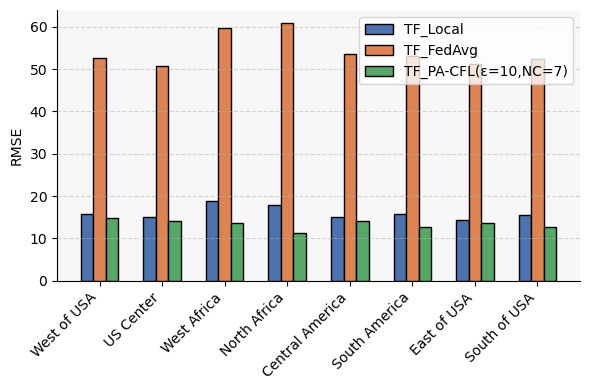

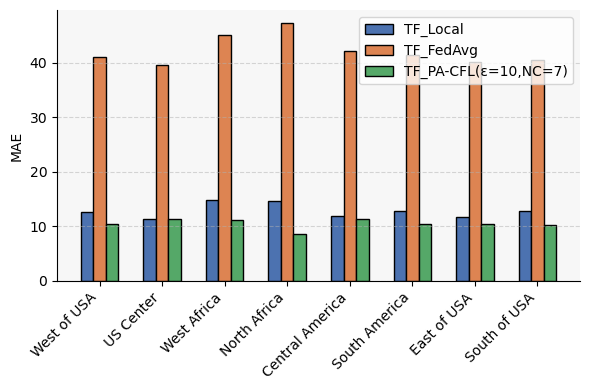

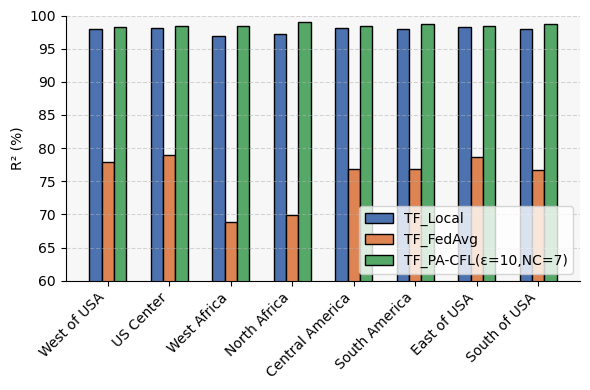

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics, models, and regions
metrics = ['RMSE', 'MAE', 'R²']
models = ['TF_Local', 'TF_FedAvg', 'TF_PA-CFL(ε=10,NC=7)']
regions = ['West of USA', 'US Center', 'West Africa', 'North Africa', 'Central America', 'South America', 'East of USA', 'South of USA']

# Data for each metric
rmse_values = [
    [15.74, 52.66, 14.90],  # West of USA
    [15.01, 50.71, 14.13],  # US Center
    [18.95, 59.83, 13.63],  # West Africa
    [18.01, 60.93, 11.19],  # North Africa
    [15.19, 53.58, 14.23],  # Central America
    [15.88, 53.06, 12.79],  # South America
    [14.38, 51.26, 13.73],  # East of USA
    [15.50, 52.37, 12.65]   # South of USA
]

mae_values = [
    [12.56, 41.15, 10.52],  # West of USA
    [11.31, 39.67, 11.32],  # US Center
    [14.85, 45.11, 11.24],  # West Africa
    [14.72, 47.35, 8.56],   # North Africa
    [11.88, 42.17, 11.40],  # Central America
    [12.76, 41.49, 10.41],  # South America
    [11.77, 40.17, 10.44],  # East of USA
    [12.91, 40.57, 10.33]   # South of USA
]

R2_values = [
    [98.01, 77.84, 98.22],  # West of USA
    [98.15, 78.96, 98.37],  # US Center
    [96.87, 68.82, 98.39],  # West Africa
    [97.28, 69.99, 98.95],  # North Africa
    [98.14, 76.85, 98.37],  # Central America
    [97.93, 76.88, 98.66],  # South America
    [98.31, 78.71, 98.46],  # East of USA
    [97.97, 76.68, 98.65]   # South of USA
]

# Define bar width and the x locations for the groups
bar_width = 0.2
x = np.arange(len(regions))

# Set up colors and font sizes
colors = ['#4C72B0', '#DD8452', '#55A868']  # Professional color palette
font_size_title = 12
font_size_labels = 10
font_size_ticks = 10

# Function to create a single plot
def create_plot(ax, data, metric, title):
    ax.bar(x - bar_width, [val[0] for val in data], bar_width, label=models[0], color=colors[0], edgecolor='black')
    ax.bar(x, [val[1] for val in data], bar_width, label=models[1], color=colors[1], edgecolor='black')
    ax.bar(x + bar_width, [val[2] for val in data], bar_width, label=models[2], color=colors[2], edgecolor='black')
    ax.set_xticks(x)
    ax.set_xticklabels(regions, rotation=45, ha='right', fontsize=font_size_ticks)
    ax.set_ylabel(metric, fontsize=font_size_labels)
    ax.set_title(title, fontsize=font_size_title)
    if metric == 'R² (%)':
        ax.legend(loc='lower right', fontsize=font_size_labels)
    else:
        ax.legend(loc='best', fontsize=font_size_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('#F7F7F7')  # Light gray background
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Plot for RMSE
fig1, ax1 = plt.subplots(figsize=(6, 4))
create_plot(ax1, rmse_values, 'RMSE', '')
plt.tight_layout()
plt.savefig('local1.png', dpi=300, bbox_inches='tight')  # Save as local1.png
plt.show()

# Plot for MAE
fig2, ax2 = plt.subplots(figsize=(6, 4))
create_plot(ax2, mae_values, 'MAE', '')
plt.tight_layout()
plt.savefig('local2.png', dpi=300, bbox_inches='tight')  # Save as local2.png
plt.show()

# Plot for R²
fig3, ax3 = plt.subplots(figsize=(6, 4))
create_plot(ax3, R2_values, 'R² (%)', '')
ax3.set_ylim(60, 100)  # Set Y-axis limits for R²
plt.tight_layout()
plt.savefig('local3.png', dpi=300, bbox_inches='tight')  # Save as local3.png
plt.show()

